## Module 1: Reference Systems
In this lab you will learn spatial attributes that are needed to work with spatial data including: Coordinate Reference Systems (CRS), Extent and spatial resolution.

A spatial reference system (SRS) or coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. Spatial reference systems are defined by the OGC's Simple feature access using well-known text, and support has been implemented by several standards-based geographic information systems. Spatial reference systems can be referred to using a SRID integer, including EPSG codes defined by the International Association of Oil and Gas Producers. It is specified in ISO 19111:2007 Geographic information—Spatial referencing by coordinates, also published as OGC Abstract Specification. (From Wikipedia)

## Reference Systems
With the help of coordinate reference systems every place on the earth can be specified by a set of three numbers, called coordinates. In general CRS can be divided into projected coordinate reference systems (also called Cartesian or rectangular coordinate reference systems) and geographic coordinate reference systems.
To define the location of something a coordinate system is often used. This system consists of an X value, a Y value (and sometimes Z axes, located within a 2 (or more) -dimensional space.             


![CRS](./resources/images/CRS.png)


## The Components of a CRS
The coordinate reference system is made up of several key components:

* Coordinate System: the X, Y grid upon which our data is overlayed and how we define where a point is located in space.
* Horizontal and vertical units: The units used to define the grid along the x, y (and z) axis.
* Datum: A modeled version of the shape of the earth which defines the origin used to place the coordinate system in space. We will explain this further, below.
* Projection Information: the mathematical equation used to flatten objects that are on a round surface (e.g. the earth) so we can view them on a flat surface (e.g. our computer screens or a paper map).

## Commonly used coordinate reference systems

ESPG 4326 - GPS

4326 is the most common spatial reference for storing / referencing data across the entire world. It serves as the default for both the PostGIS spatial database and the GeoJSON standard. It is also used by default in most web mapping libraries.

Because of its use in GPS, 4326 is generally assumed to be the spatial reference when talking about "latitude" or "longitude".

ESPG 3857 - Web Mercator

The Web Mercator coordinate reference system is the default in most web mapping libraries. Web Mercator preserves a consistent direction and north is always "up" on a Web Mercator map. Angles are also depicted accurately, so a 90-degree turn on a Web Mercator map will actually look like a right angle. That said, the projection distorts both shape and size as distance from the equator increases.

Web Mercator is ideal for generating map tiles since it will project the world into a square that can be subdivided evenly across zoom levels. For example one tile at zoom level 1, four tiles at zoom level 2 and so on.

In the below example a Geographic CRS is used where the units are degrees and the coordinate system is Latitude and longitude with the origin being the location where the equator meets the central meridian on the globe (0,0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

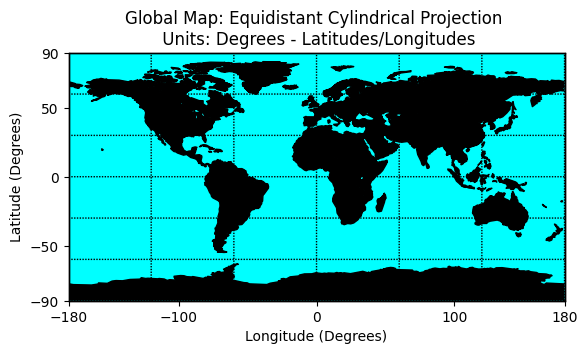

In [2]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua')

m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

plt.title("Global Map: Equidistant Cylindrical Projection \n Units: Degrees - Latitudes/Longitudes")
plt.xticks([-180,-100,0,100,180])
plt.yticks([-90,-50,0,50,90])
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.show()

We can add three coordinate locations to our map. Note that the UNITS are in decimal degrees (latitude, longitude):

* Boulder, Colorado: 40.0274, -105.2519
* Oslo, Norway: 59.9500, 10.7500
* Mallorca, Spain: 39.6167, 2.9833

Let’s create a second map with the locations overlayed on top of the continental boundary layer.

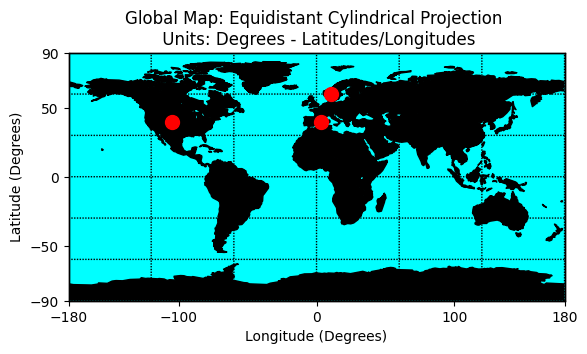

In [3]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder = 1)

m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua', zorder=0)

# Add three coordinate locations to our map
# Boulder, Colorado:  40.0274, -105.2519
# Oslo, Norway: 59.9500, 10.7500
# Mallorca, Spain: 39.6167, 2.9833
lats = [40.0274, 59.9500, 39.6167]
lons = [-105.2519,10.7500,2.9833]
plt.scatter(lons,lats,s=100, c='red', zorder=2)

plt.title("Global Map: Equidistant Cylindrical Projection \n Units: Degrees - Latitudes/Longitudes")
plt.xticks([-180,-100,0,100,180])
plt.yticks([-90,-50,0,50,90])
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')

plt.show()

## Geographic CRS - The Good & The Less Good
Geographic coordinate systems in decimal degrees are helpful when we need to locate places on the Earth. However, latitude and longitude locations are not located using uniform measurement units. Thus, geographic CRSs are not ideal for measuring distance. This is why other projected CRS have been developed.

![LatLongfromGlobeCenter Source: ESRI](./resources/images/LatLongfromGlobeCenter.gif)

A geographic coordinate system locates latitude and longitude location using angles. Thus the spacing of each line of latitude moving north and south is not uniform. 

The same data can be viewed in another CRS - Robinson. Robinson is a projected CRS. Notice that the country boundaries on the map - have a different shape compared to the map that we created above in the CRS:
Geographic lat/long WGS84.

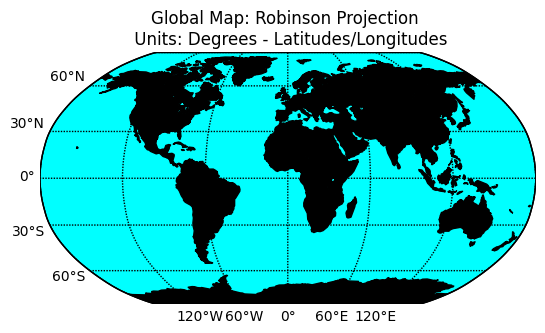

In [4]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder=1)

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) 
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) 
m.drawmapboundary(fill_color='aqua',zorder=0)

plt.title("Global Map: Robinson Projection \n Units: Degrees - Latitudes/Longitudes")
plt.show()

Now lets try to add the same Lat / Long coordinate locations that we used above, to our map, with the CRS of Robinsons

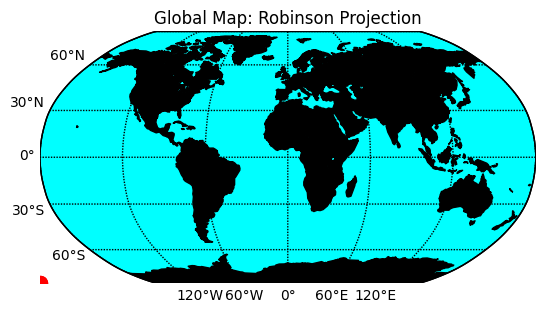

In [5]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder=1)

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) 
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) 
m.drawmapboundary(fill_color='aqua',zorder=0)

# Add three coordinate locations to our map
# Boulder, Colorado:  40.0274, -105.2519
# Oslo, Norway: 59.9500, 10.7500
# Mallorca, Spain: 39.6167, 2.9833
lats = [40.0274, 59.9500, 39.6167]
lons = [-105.2519,10.7500,2.9833]
plt.scatter(lons,lats,s=100, c='red', zorder=2)

plt.title("Global Map: Robinson Projection")
plt.show()

Notice above that the points are not in the correct location, they are in the lower left corner. As degrees coordinates are not what is used for the robinson projection so they would need to be converted to match the new projection - a process often referred to as re-projection.                        

[7834060.139487239, 17797350.232538477, 17246761.402003318]
[12889971.872362368, 14939552.41239293, 12846365.315049995]


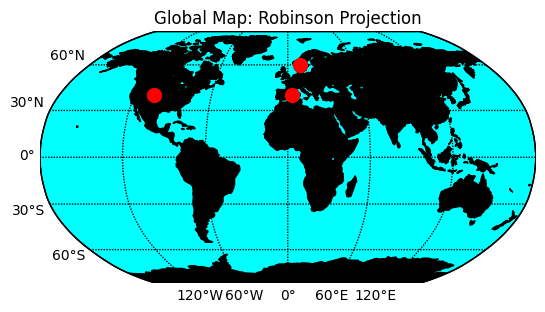

In [6]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder=1)

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) 
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) 
m.drawmapboundary(fill_color='aqua',zorder=0)

# Add three coordinate locations to our map
# Boulder, Colorado:  40.0274, -105.2519
# Oslo, Norway: 59.9500, 10.7500
# Mallorca, Spain: 39.6167, 2.9833
lats = [40.0274, 59.9500, 39.6167]
lons = [-105.2519,10.7500,2.9833]

# notice the coordinate system in the Robinson projection (CRS) is DIFFERENT
# from the coordinate values for the same locations in a geographic CRS.
# Reprojection is very simple in python: 
x,y = m(lons,lats)
print(x)
print(y)
plt.scatter(x,y,s=100, c='red', zorder=2)
plt.title("Global Map: Robinson Projection")
plt.show()

## Compare Maps
Both of the plots above look visually different and also use a different coordinate system. Let’s look at both, side by side, with the actual graticules or latitude and longitude lines rendered on the map.

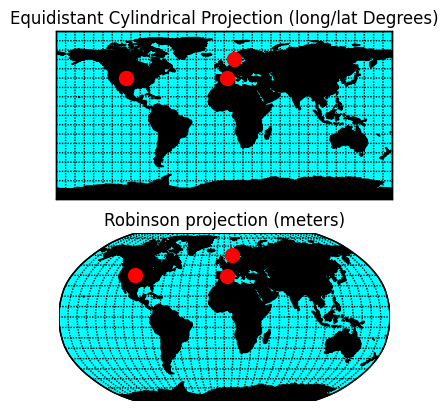

In [7]:
fig, axes = plt.subplots(2, 1)

# Map 1
axes[0].set_title("Equidistant Cylindrical Projection (long/lat Degrees)")
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=axes[0])

m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder = 1)

m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='aqua', zorder=0)

# Add three coordinate locations to our map
# Boulder, Colorado:  40.0274, -105.2519
# Oslo, Norway: 59.9500, 10.7500
# Mallorca, Spain: 39.6167, 2.9833
lats = [40.0274, 59.9500, 39.6167]
lons = [-105.2519,10.7500,2.9833]

axes[0].scatter(lons,lats,s=100, c='red', zorder=2)

# Map 2
axes[1].set_title("Robinson projection (meters)")

m = Basemap(projection='robin',lon_0=0,resolution='c', ax=axes[1])
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='aqua', zorder=1)

m.drawparallels(np.arange(-90.,120.,10.))
m.drawmeridians(np.arange(0.,360.,10.))
m.drawmapboundary(fill_color='aqua',zorder=0)

# Add three coordinate locations to our map
# Boulder, Colorado:  40.0274, -105.2519
# Oslo, Norway: 59.9500, 10.7500
# Mallorca, Spain: 39.6167, 2.9833
lats = [40.0274, 59.9500, 39.6167]
lons = [-105.2519,10.7500,2.9833]
x,y = m(lons,lats)
axes[1].scatter(x,y,s=100, c='red', zorder=2)

plt.show()

## Why Multiple CRS?
You may be wondering, why bother with different CRSs if it makes our analysis more complicated? Well, each CRS is optimized to best represent:

* Shape and/or
* Scale / distance and/or
* Area

of features in the data. No one CRS is great at optimizing shape, distance AND area. Some CRSs are optimized for shape, some distance, some area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe or Nordic countries. Discussing CRS as it optimizes shape, distance and area is beyond the scope of this tutorial, but it’s important to understand that the CRS that you chose for your data, will impact working with the data!

## Conclusion
This lab covered:
* Coordinate reference system
* Reprojection of data using Python